In [1]:
##Projet Analyse Yasmine Atraoui

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

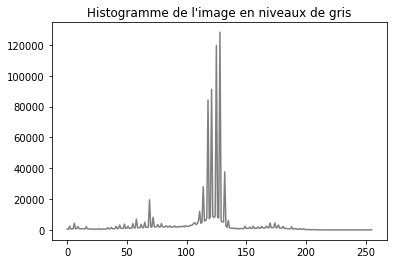

In [3]:
#on charge et on trace d'abord l'histogramme de l'image
image = cv2.imread('puzzle.jpg', cv2.IMREAD_GRAYSCALE)
histogramme = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(histogramme, color='gray')
plt.title("Histogramme de l'image en niveaux de gris")
plt.show()

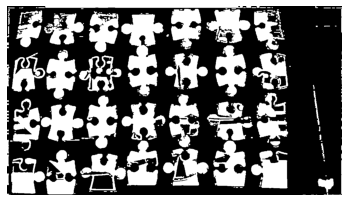

In [98]:
##Deux essaies principales de binarisation : le premier qui defini bien les pieces, mais laisse a l'interieur beaucoup de trous, 
##et l'autre qui n'as pas de trous mais des pieces sont fusionnées entre elles

filtre_image = cv2.medianBlur(image, 5)

alpha = 1.5  
beta = 0    
image_contraste = cv2.convertScaleAbs(image_filtered, alpha=alpha, beta=beta)

resultat = cv2.adaptiveThreshold(image_contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

#resultat = cv2.threshold(image_contraste, 110, 140, cv2.THRESH_BINARY)

matrice_kernel = np.ones((4,4),np.uint8)
resultat_dilatation = cv2.dilate(resultat, matrice_kernel, iterations=1)

matrice_kernel = np.ones((4,4), np.uint8)  
resultat_erosion = cv2.erode(resultat_dilatation, matrice_kernel, iterations=1) 

matrice_kernel = np.ones((4,5),np.uint8)
resultat_dilatation = cv2.dilate(resultat_erosion, matrice_kernel, iterations=1)

matrice_kernel = np.ones((2,2), np.uint8) 
resultat_erosion = cv2.erode(resultat_dilatation, matrice_kernel, iterations=3)  

matrice_kernel = np.ones((2,2),np.uint8)
resultat_dilatation = cv2.dilate(resultat_erosion, matrice_kernel, iterations=2)

contours, _ = cv2.findContours(resultat_dilatation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = np.zeros_like(image, dtype=np.uint8)

contour_img = np.zeros_like(image, dtype=np.uint8)

cv2.drawContours(contour_img, contours, -1, (255), thickness=cv2.FILLED)

plt.imshow(contour_img, cmap='gray')
plt.axis('off')
plt.show()


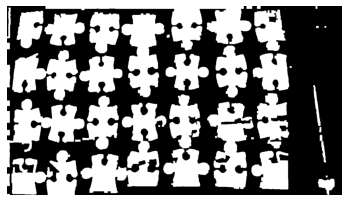

In [63]:
##Deuxieme essaie
filtre_image = cv2.medianBlur(image, 5)

alpha = 1.5  
beta = 0    
image_contraste = cv2.convertScaleAbs(filtre_image, alpha=alpha, beta=beta)

resultat = cv2.adaptiveThreshold(image_contrast, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

matrice_kernel = np.ones((3, 3), np.uint8)
resultat = cv2.morphologyEx(resultat, cv2.MORPH_CLOSE, matrice_kernel)


matrice_kernel = np.ones((4,4),np.uint8)
resultat_dilatation = cv2.dilate(resultat, matrice_kernel, iterations=1)

matrice_kernel = np.ones((4,4), np.uint8)
resultat_erosion = cv2.erode(resultat_dilatation, matrice_kernel, iterations=1)  

matrice_kernel = np.ones((4,5),np.uint8)
resultat_dilatation = cv2.dilate(resultat_erosion, matrice_kernel, iterations=1)

matrice_kernel = np.ones((2,2), np.uint8) 
resultat_erosion = cv2.erode(resultat_dilatation, matrice_kernel, iterations=3) 

matrice_kernel = np.ones((4,4),np.uint8)
resultat_dilatation = cv2.dilate(resultat_erosion, matrice_kernel, iterations=2)

matrice_kernel = np.ones((3,3), np.uint8)  
resultat_erosion = cv2.erode(resultat_dilatation, matrice_kernel, iterations=3)  

matrice_kernel = np.ones((5,5),np.uint8)
resultat_dilatation = cv2.dilate(resultat_erosion, matrice_kernel, iterations=2)

matrice_kernel = np.ones((4,4), np.uint8)  
resultat_erosion = cv2.erode(resultat_dilatation, matrice_kernel, iterations=3)  

matrice_kernel = np.ones((4,4),np.uint8)
resultat_dilatation = cv2.dilate(resultat_erosion, matrice_kernel, iterations=2)

contours, _ = cv2.findContours(resultat_dilatation , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = np.zeros_like(image, dtype=np.uint8)

contour_img = np.zeros_like(image, dtype=np.uint8)

cv2.drawContours(contour_img, contours, -1, (255), thickness=cv2.FILLED)

plt.imshow(contour_img, cmap='gray')
plt.axis('off')
plt.savefig("puzzle_binarise.png")
plt.show()

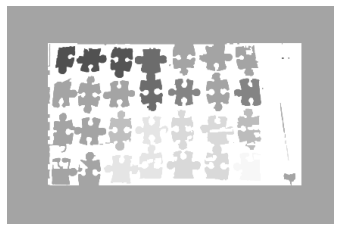

In [84]:
##J'ai gardé le deuxieme resultat pour la suite, j'ai enregistré limage avec le nom "puzzle_binarise"
##J'ai afccihé les piececs sur un fond blanc au debut
##Pieces en nuances de gris sur fond blanc

puzzle_mask = cv2.imread('puzzle_binarise.png', cv2.IMREAD_GRAYSCALE)

inversion_noir_blanc = cv2.bitwise_not(puzzle_mask)

puzzle_rgb = cv2.cvtColor(inversion_noir_blanc, cv2.COLOR_GRAY2RGB)

nombre_pieces, labels, status, centroids = cv2.connectedComponentsWithStats(puzzle_mask, connectivity=8)

nombre_lignes = max(centroids[:, 1])

nuances_gris = 255 / nombre_lignes

for label in range(1, nombre_pieces):
    puzzle_piece = np.where(labels == label, 255, 0).astype(np.uint8)
    
    centroid = centroids[label]
    nombre_ligne = int(centroid[1]) 
    
    intensite = int(nombre_ligne * nuances_gris)
    
    puzzle_rgb[:, :, 0] = np.clip(puzzle_rgb[:, :, 0].astype(np.int32) + (puzzle_piece / 255) * intensite, 0, 255).astype(np.uint8)
    puzzle_rgb[:, :, 1] = np.clip(puzzle_rgb[:, :, 1].astype(np.int32) + (puzzle_piece / 255) * intensite, 0, 255).astype(np.uint8)
    puzzle_rgb[:, :, 2] = np.clip(puzzle_rgb[:, :, 2].astype(np.int32) + (puzzle_piece / 255) * intensite, 0, 255).astype(np.uint8)

plt.imshow(puzzle_rgb)
plt.axis('off')
plt.show()




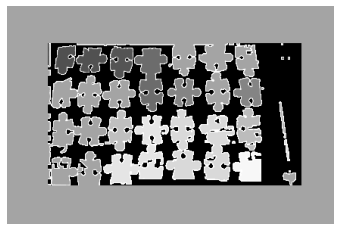

In [86]:
##Pieces sur fond noir en nuances de gris mais les pieces ont un contour blanc..

puzzle_mask = cv2.imread('puzzle_binarise.png', cv2.IMREAD_GRAYSCALE)

inversion_noir_blanc = cv2.bitwise_not(puzzle_mask)

puzzle_rgb = cv2.cvtColor(inverted_puzzle_mask, cv2.COLOR_GRAY2RGB)


puzzle_rgb[np.all(puzzle_rgb == [255, 255, 255], axis=-1)] = [0, 0, 0]

nombre_pieces, labels, status, centroids = cv2.connectedComponentsWithStats(puzzle_mask, connectivity=8)

nombre_lignes = max(centroids[:, 1])

nuances_gris = 255 / nombre_lignes

for label in range(1, nombre_pieces):
    puzzle_piece = np.where(labels == label, 255, 0).astype(np.uint8)
    
    centroid = centroids[label]
    nombre_ligne = int(centroid[1]) 
    
    intensite = int(nombre_ligne * nuances_gris)
    
    puzzle_rgb[:, :, 0] = np.clip(puzzle_rgb[:, :, 0].astype(np.int32) + (puzzle_piece / 255) * intensite, 0, 255).astype(np.uint8)
    puzzle_rgb[:, :, 1] = np.clip(puzzle_rgb[:, :, 1].astype(np.int32) + (puzzle_piece / 255) * intensite, 0, 255).astype(np.uint8)
    puzzle_rgb[:, :, 2] = np.clip(puzzle_rgb[:, :, 2].astype(np.int32) + (puzzle_piece / 255) * intensite, 0, 255).astype(np.uint8)

plt.imshow(puzzle_rgb)
plt.axis('off')
plt.show()

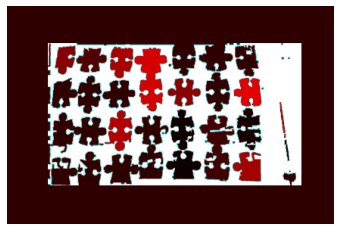

In [105]:
##J'ai essayé de donner a chaque piece une nuance de rouge aléatoire

puzzle_mask = cv2.imread('puzzle_binarise.png', cv2.IMREAD_GRAYSCALE)

puzzle_rgb = cv2.cvtColor(inverted_puzzle_mask, cv2.COLOR_GRAY2RGB)

nomre_pieces, labels, status, centroids = cv2.connectedComponentsWithStats(puzzle_mask, connectivity=8)

for label in range(1, nomre_pieces):
    nuance_rouge = np.random.randint(256)
    puzzle_piece = np.where(labels == label, 255, 0).astype(np.uint8)
    puzzle_rgb[:, :, 0] += puzzle_piece * nuance_rouge

plt.imshow(puzzle_rgb)
plt.axis('off')
plt.show()
